In [1]:
import pandas as pd
import numpy as np

In [77]:
df = pd.read_csv(r"D:/Study/BA/diabetes.csv")

In [78]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [79]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

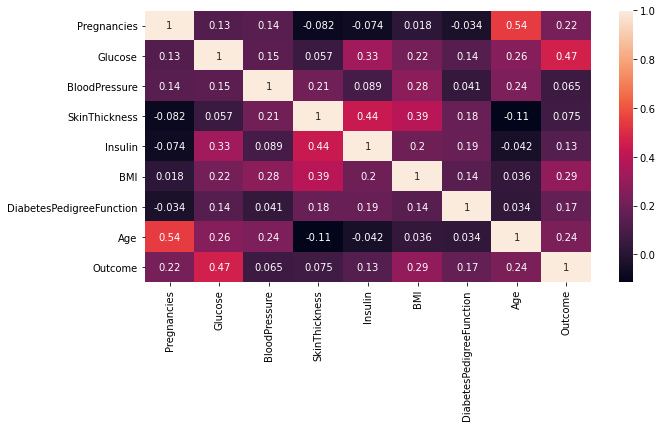

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [220]:
from sklearn.model_selection import train_test_split

In [295]:
y = df['Outcome']
x = df.drop(["Outcome","DiabetesPedigreeFunction","Pregnancies","BloodPressure","SkinThickness","Insulin"],axis=1)

In [296]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [297]:
from xgboost import XGBClassifier

In [298]:
classifier=XGBClassifier()

In [299]:
classifier.fit(x_train,y_train)

[12:58:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [369]:
classifier=XGBClassifier(
n_estimators=1000,
min_child_weight=6, 
max_depth=12, 
learning_rate=0.006).fit(x_train,y_train)

[13:11:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [370]:
result = classifier.predict(x_test)

In [371]:
from sklearn.metrics import accuracy_score

In [372]:
accuracy = accuracy_score(result, y_test)

In [373]:
accuracy

0.7662337662337663

In [374]:
from sklearn.metrics import confusion_matrix

In [375]:
cm = confusion_matrix(y_test,result)

In [376]:
cm

array([[86, 14],
       [22, 32]], dtype=int64)

In [377]:
x.shape

(768, 3)

In [378]:
x.columns

Index(['Glucose', 'BMI', 'Age'], dtype='object')

# Please Check the Images in the same folder of Git hub for a deployment of model with the help of TKinter